# Reaction Metrics and Validation 

In [1]:
import numpy as np
import pandas as pd
import json
from os import path
import matplotlib.pyplot as plt
% matplotlib inline
from collections import OrderedDict
import thermodat

## Choosing a file

In [2]:
filename = 'Chernosky1985-phase-rxn.xlsx'
path = '../../../data/phase-rxn/'
path += filename

## Converting to json

In [3]:
thermodat.xls_to_json(path)
# converting to python dictionary
json_file = open('../../../data/phase-rxn/Chernosky1985-phase-rxn.json').read()
data = json.loads(json_file)

## Creating pandas dataframe

In [4]:
N = len(data['rxn']['data'])
reaction_studied = []
P = []
P_err = []
T = []
T_err = []
reaction_metric = []
results = []
duration = []
for i in xrange(N):
    reaction_studied.append(str(data['rxn']['data'][i]['rxn_studied']))
    reaction_metric.append(str(data['rxn']['data'][i]['rxn_metric_resid']))
    results.append(str(data['rxn']['data'][i]['results']))
    P.append(data['experimental_conditions']['data'][i]['P'])
    P_err.append(data['experimental_conditions']['data'][i]['P_err'])
    T.append(data['experimental_conditions']['data'][i]['T'])
    T_err.append(data['experimental_conditions']['data'][i]['T_err'])
    duration.append(data['experimental_conditions']['data'][i]['equil_time'])
    
df = pd.DataFrame({'reaction_studied': reaction_studied,
                  'P': P,
                  'P_err': P_err,
                  'T': T,
                  'T_err': T_err,
                  'metric': reaction_metric,
                  'results': results,
                  'duration': duration})

## View data

In [5]:
df

P  P_err    T  T_err  duration metric              reaction_studied  \
0    0.5   0.05  656      3      2160    4.5        Tlc = 3 En + Qz + H2O    
1    1.0   0.05  700      6      2256    4.5        Tlc = 3 En + Qz + H2O    
2   10.0   0.30  780      5        46    4.5        Tlc = 3 En + Qz + H2O    
3   10.0   0.30  790      5        44    4.5        Tlc = 3 En + Qz + H2O    
4   10.0   0.30  800      5       110    4.5        Tlc = 3 En + Qz + H2O    
5   13.0   0.30  800      5        67   2.75        Tlc = 3 En + Qz + H2O    
6   13.6   0.30  785      5        47    4.5        Tlc = 3 En + Qz + H2O    
7   17.0   0.30  795      5        38    4.5        Tlc = 3 En + Qz + H2O    
8   10.0   0.30  810      5        89   2.75         Ath = 7 En + Qz + H2O   
9   10.0   0.30  820      5        70    4.5         Ath = 7 En + Qz + H2O   
10   1.0   0.05  652      3      2136   2.75         Tlc + Fo = 5 En + H2O   
11   2.0   0.05  650      2      2472    4.5         Tlc + Fo = 5 En + H2O   
12   3.0   0.05  673      3      2472    4.5         Tlc + Fo = 5 En + H2O   
13   4.0   0.05  691      3      1896   2.75         Tlc + Fo = 5 En + H2O   
14   6.0   0.05  679      2      1632    4.5         Tlc + Fo = 5 En + H2O   
15   6.0   0.05  694      2      2472   2.75         Tlc + Fo = 5 En + H2O   
16   0.5   0.05  597      7      1608   2.75  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
17   0.5   0.05  632      4      1776   1.25  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
18   0.5   0.05  667      2      1728   2.75  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
19   0.5   0.05  678      4      2184   2.75  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
20   1.0   0.05  626      5      3216    4.5  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
21   1.0   0.05  646      5      6720   1.25  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
22   2.0   0.05  635      6      6696    4.5  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
23   2.0   0.05  660      3      1680   1.25  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
24   2.0   0.05  680      2      1704   2.75  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
25   3.0   0.05  633      2      1728   2.75  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
26   3.0   0.05  666      4      4488    4.5  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
27   3.0   0.05  675      5      1728   1.25  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
28   3.0   0.05  702      3      1464   2.75  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
29   4.0   0.05  677      5      1632   1.25  9 Tlc + 4 Fo = 5 Ath + 4 H2O   
..   ...    ...  ...    ...       ...    ...                           ...   
43   3.0   0.05  695      2      3072   2.75         Ath + Fo = 9 En + H2O   
44   3.0   0.05  734      2      3048   1.25         Ath + Fo = 9 En + H2O   
45   4.0   0.05  654      2      1584   2.75         Ath + Fo = 9 En + H2O   
46   4.0   0.05  677      5      1632   1.25         Ath + Fo = 9 En + H2O   
47   5.0   0.05  632      7      1608    4.5         Ath + Fo = 9 En + H2O   
48   5.0   0.05  666      4      1344    4.5         Ath + Fo = 9 En + H2O   
49   5.0   0.05  675      3      4368   1.25         Ath + Fo = 9 En + H2O   
50   5.0   0.05  684      3      1392   1.25         Ath + Fo = 9 En + H2O   
51   5.0   0.05  735      1      1968    4.5         Ath + Fo = 9 En + H2O   
52   6.0   0.05  661      2      1680    4.5         Ath + Fo = 9 En + H2O   
53   6.0   0.05  701      6      3024   2.75         Ath + Fo = 9 En + H2O   
54   4.0   0.05  610      2      1104    4.5              Tlc + 4 En = Ath   
55   5.0   0.05  686      2      2064    4.5              Tlc + 4 En = Ath   
56   6.0   0.05  655      2       792    4.5              Tlc + 4 En = Ath   
57   6.0   0.05  665      3      3552    4.5              Tlc + 4 En = Ath   
58   6.0   0.05  674      2      3552    4.5              Tlc + 4 En = Ath   
59   6.0   0.05  689      3      2016    4.5              Tlc + 4 En = Ath   
60   8.0   0.30  770      5       149   2.75              Tlc + 4 En = Ath   
61   9.0   0.30  770      5       143   1.25              Tlc + 4 En = Ath   
62  10.0   0.30  730      5  

## Reactions studied and number of experiments

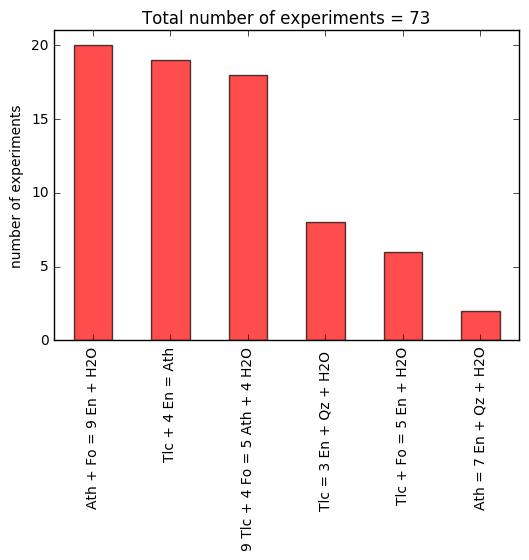

In [6]:
df['reaction_studied'].value_counts().plot.bar(color='r',alpha=0.7)
plt.ylabel('number of experiments')
plt.ylim([0,max(df['reaction_studied'].value_counts())+1])
plt.title('Total number of experiments = {}'.format(N))
plt.show()

## P-T plots of experiments

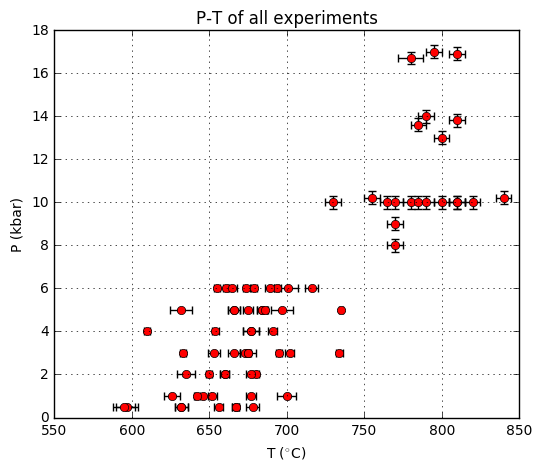

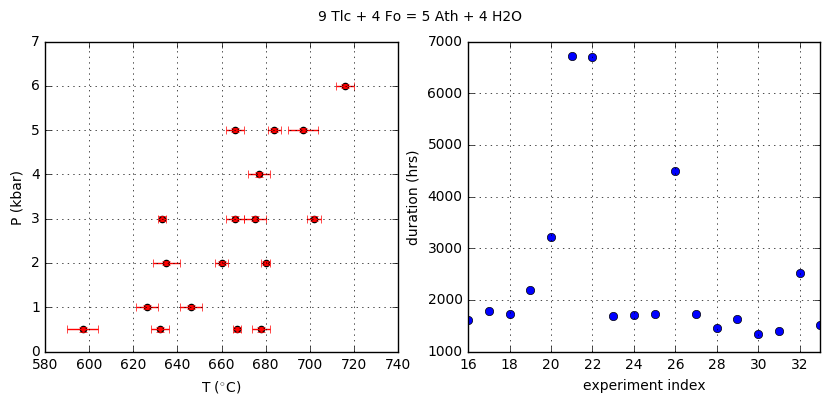

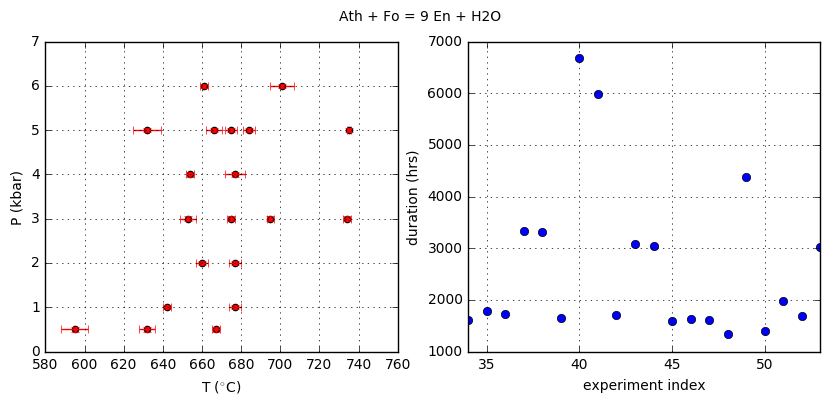

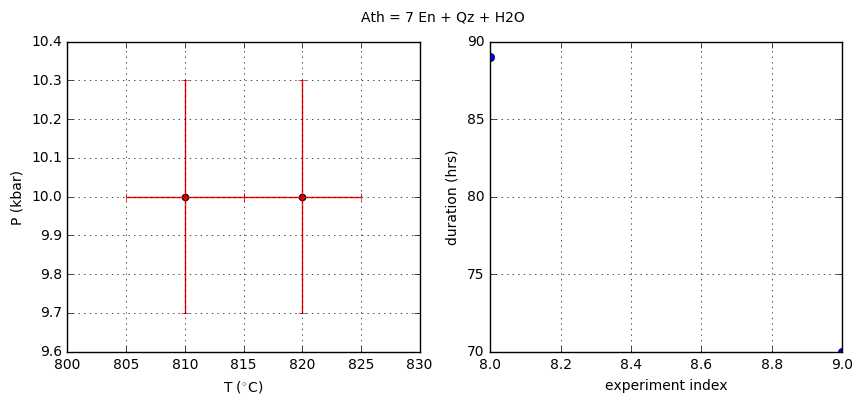

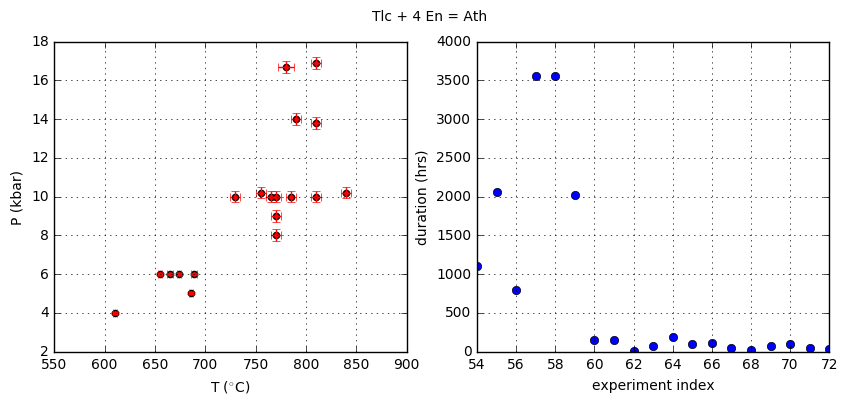

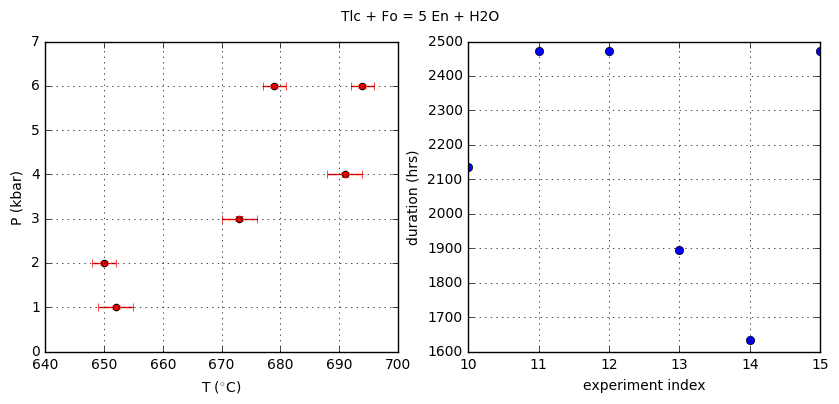

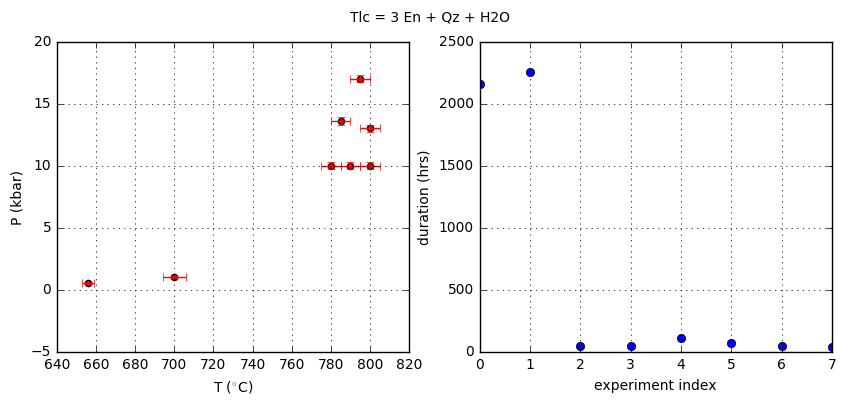

In [7]:
plt.figure(figsize=(6,5))
plt.errorbar(df['T'],df['P'],xerr=df['T_err'],yerr=df['P_err'],fmt='ro', ecolor='k', capthick=1)
plt.grid()
plt.xlabel("T ($^{\circ}$C)")
plt.ylabel("P (kbar)")
plt.title('P-T of all experiments')
plt.show()

reactions = df.groupby('reaction_studied')
for name, reaction in reactions:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    fig.suptitle(name)
    reaction.plot(x='T',y='P',xerr='T_err', yerr='P_err', ax=axes[0], kind='scatter', grid=True, c='r')
    axes[0].set_xlabel("T ($^{\circ}$C)")
    axes[0].set_ylabel("P (kbar)")
    reaction.plot(y='duration', ax=axes[1], style='bo', legend=False, grid=True)
    axes[1].set_xlabel("experiment index")
    axes[1].set_ylabel("duration (hrs)")
    plt.show()